<a href="https://colab.research.google.com/github/YochaiKariv/Fall2023/blob/main/mfds_Home_work_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
def plot(x,title=None):
    # Move tensor to CPU and convert to numpy
    x_np = x.detach().cpu().numpy()

    # If tensor is in (C, H, W) format, transpose to (H, W, C)
    if x_np.shape[0] == 3 or x_np.shape[0] == 1:
        x_np = x_np.transpose(1, 2, 0)

    # If grayscale, squeeze the color channel
    if x_np.shape[2] == 1:
        x_np = x_np.squeeze(2)

    x_np = x_np.clip(0, 1)

    fig, ax = plt.subplots()
    if len(x_np.shape) == 2:  # Grayscale
        im = ax.imshow(x_np, cmap='gray')
    else:
        im = ax.imshow(x_np)
    plt.title(title)
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
# Downloading and extracting the dataset
# Uncomment the following lines if you are running this in a Jupyter Notebook
!wget https://gist.githubusercontent.com/JosephKJ/94c7728ed1a8e0cd87fe6a029769cde1/raw/403325f5110cb0f3099734c5edb9f457539c77e9/Oxford-102_Flower_dataset_labels.txt
!wget https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip
!unzip 'flower_data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: flower_data/train/7/image_07232.jpg  
  inflating: flower_data/train/7/image_08101.jpg  
  inflating: flower_data/train/7/image_07226.jpg  
  inflating: flower_data/train/7/image_07227.jpg  
  inflating: flower_data/train/7/image_08100.jpg  
  inflating: flower_data/train/7/image_07233.jpg  
   creating: flower_data/train/29/
  inflating: flower_data/train/29/image_04152.jpg  
  inflating: flower_data/train/29/image_04147.jpg  
  inflating: flower_data/train/29/image_04153.jpg  
  inflating: flower_data/train/29/image_04151.jpg  
  inflating: flower_data/train/29/image_04150.jpg  
  inflating: flower_data/train/29/image_04144.jpg  
  inflating: flower_data/train/29/image_04140.jpg  
  inflating: flower_data/train/29/image_04154.jpg  
  inflating: flower_data/train/29/image_04155.jpg  
  inflating: flower_data/train/29/image_04141.jpg  
  inflating: flower_data/train/29/image_04157.jpg  
  inflating: flower_data/train/29/im

In [ ]:
import torch
from torchvision import datasets, transforms
import os
import pandas as pd

# Directory and transforms
data_dir = '/content/flower_data/'
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

data_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Load the dataset using ImageFolder
dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transform)
dataset_labels = pd.read_csv('Oxford-102_Flower_dataset_labels.txt', header=None)[0].str.replace("'", "").str.strip()

# Load the dataset into a DataLoader for batching
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
# Extract the batch of images and labels
images, labels = next(iter(dataloader))

print(f"Images tensor shape: {images.shape}")
print(f"Labels tensor shape: {labels.shape}")


Images tensor shape: torch.Size([32, 3, 224, 224])
Labels tensor shape: torch.Size([32])


In [ ]:
images[0].shape

torch.Size([3, 224, 224])

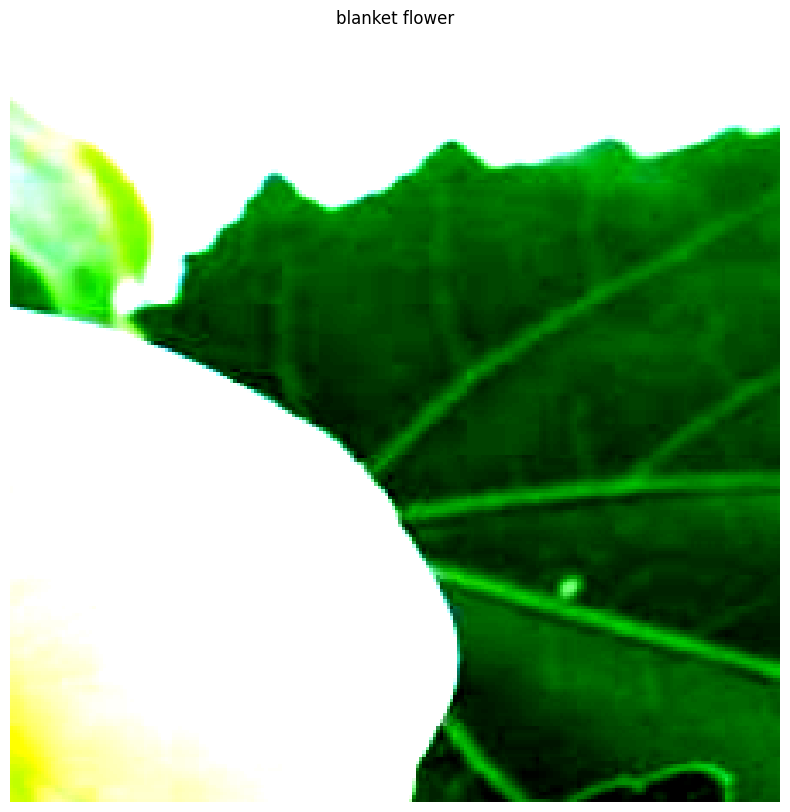

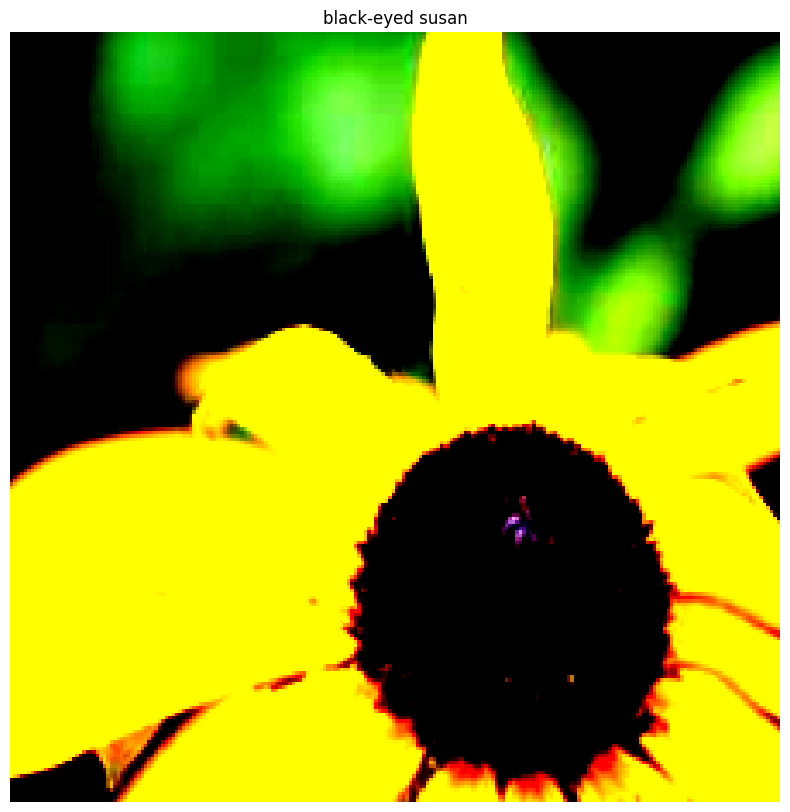

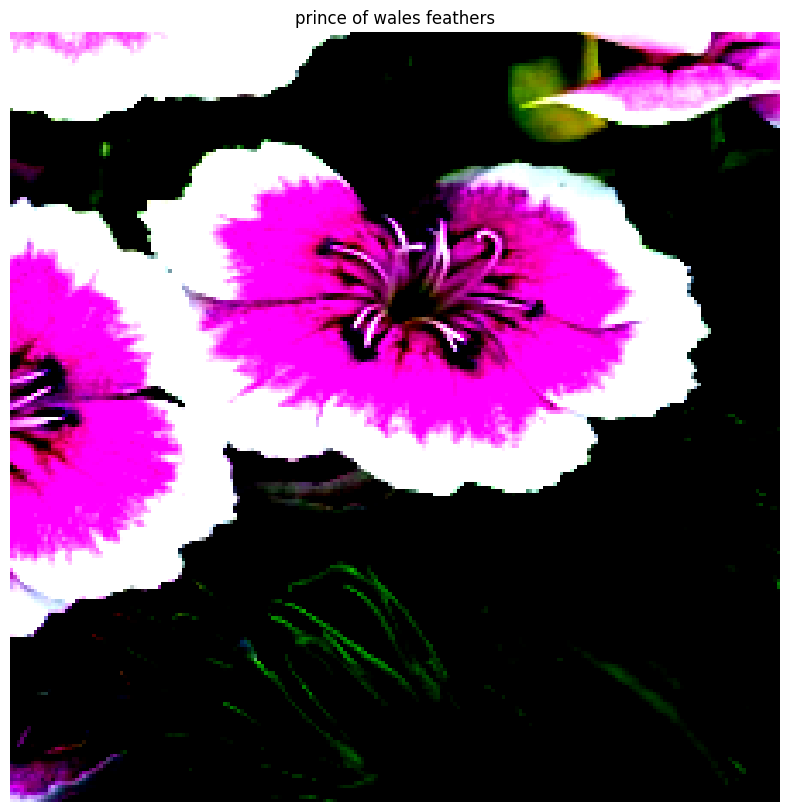

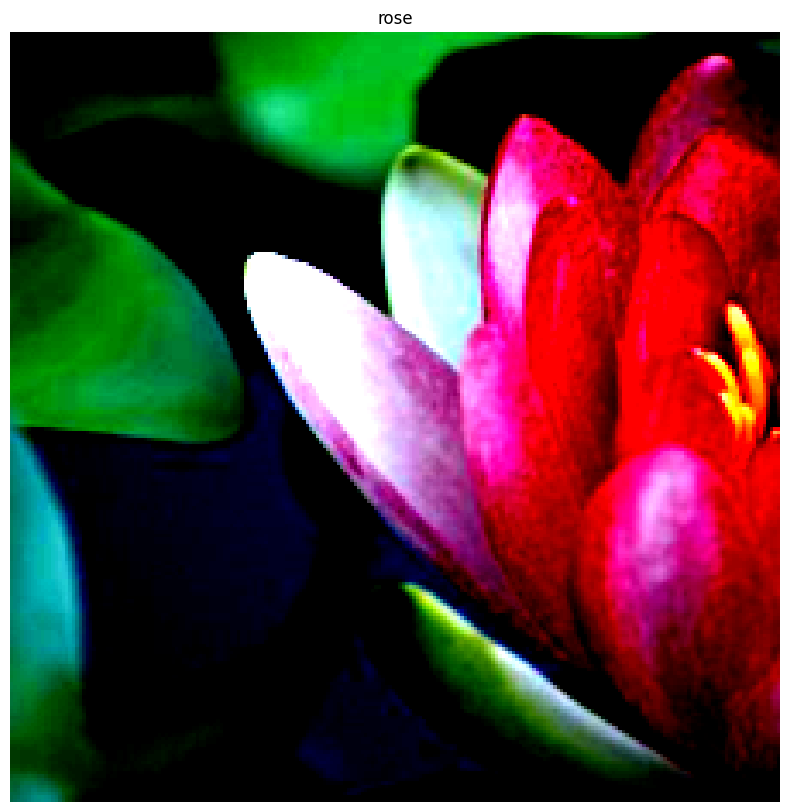

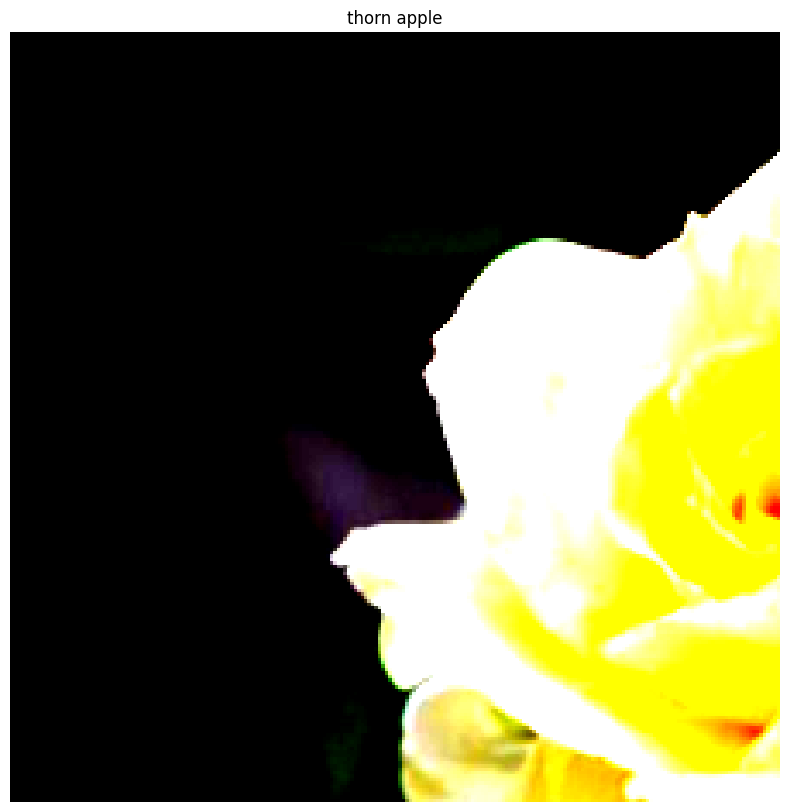

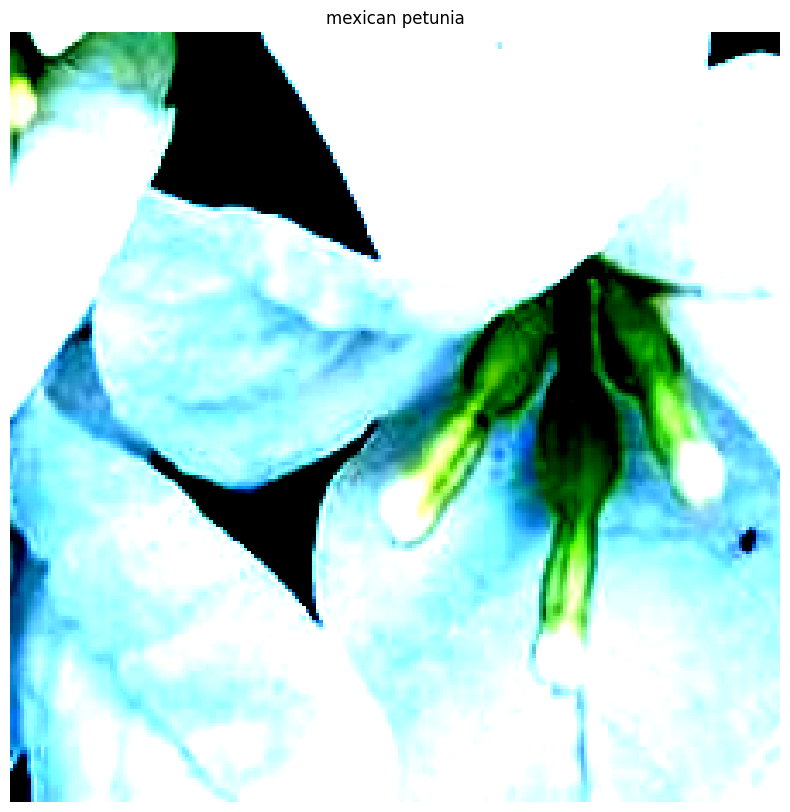

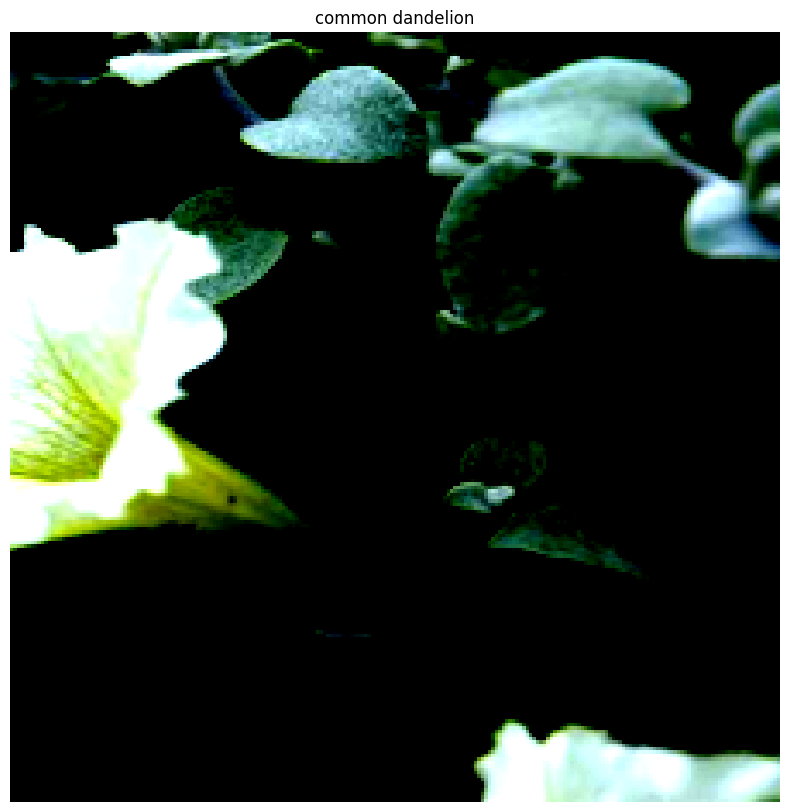

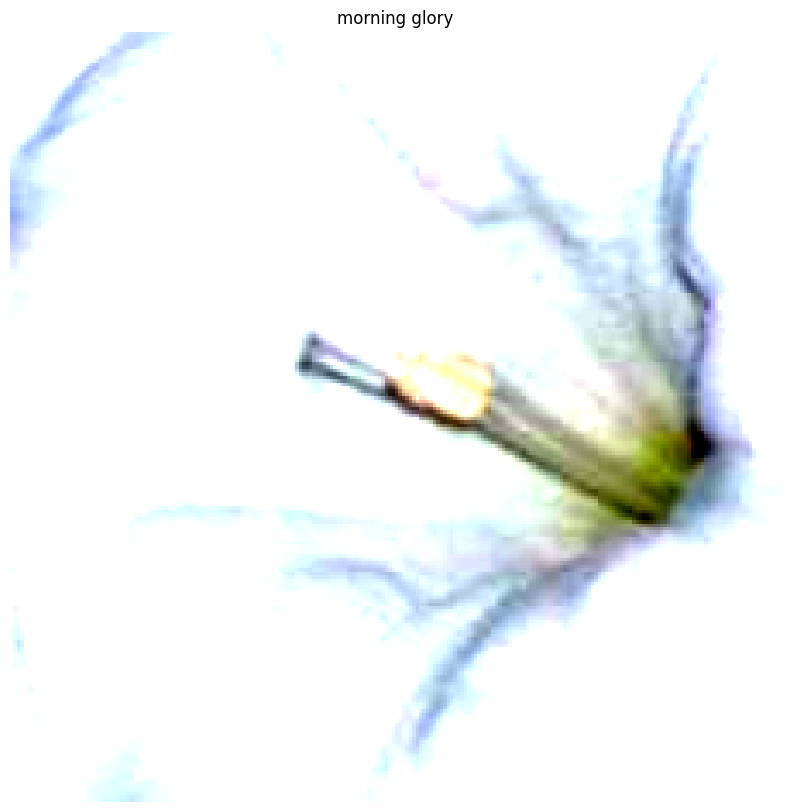

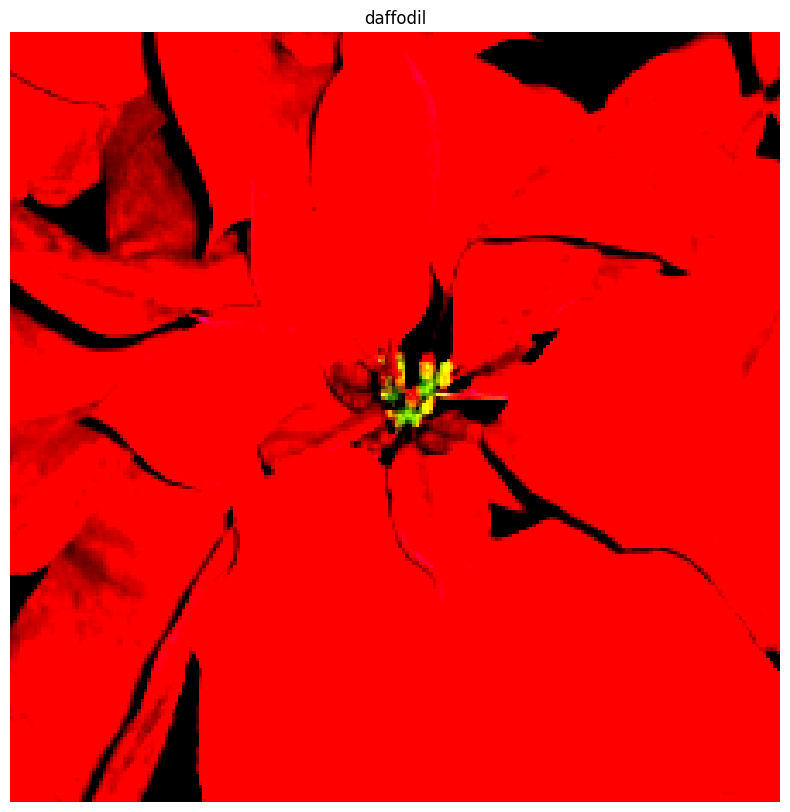

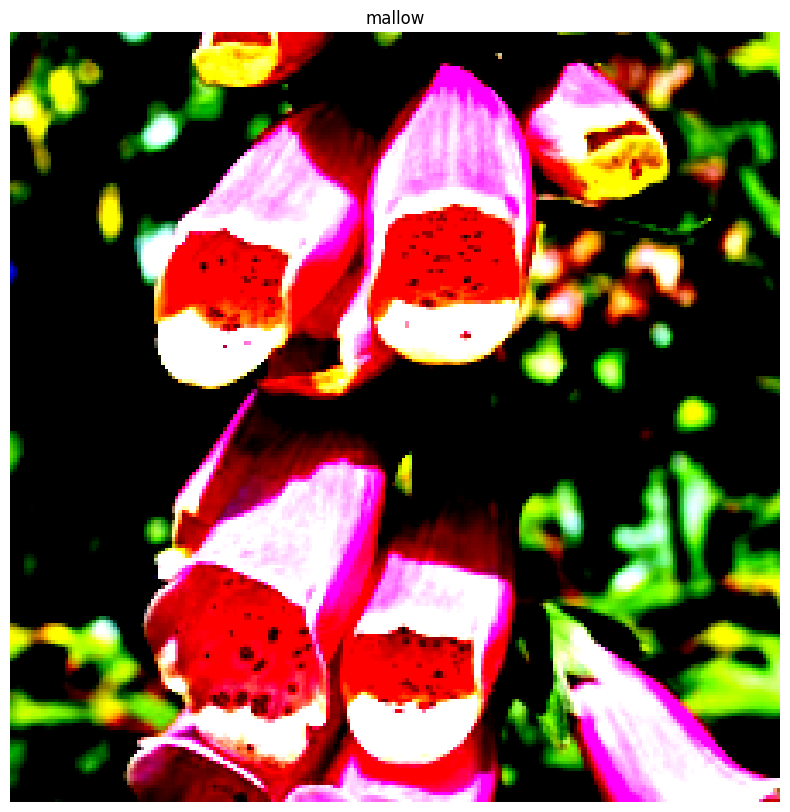

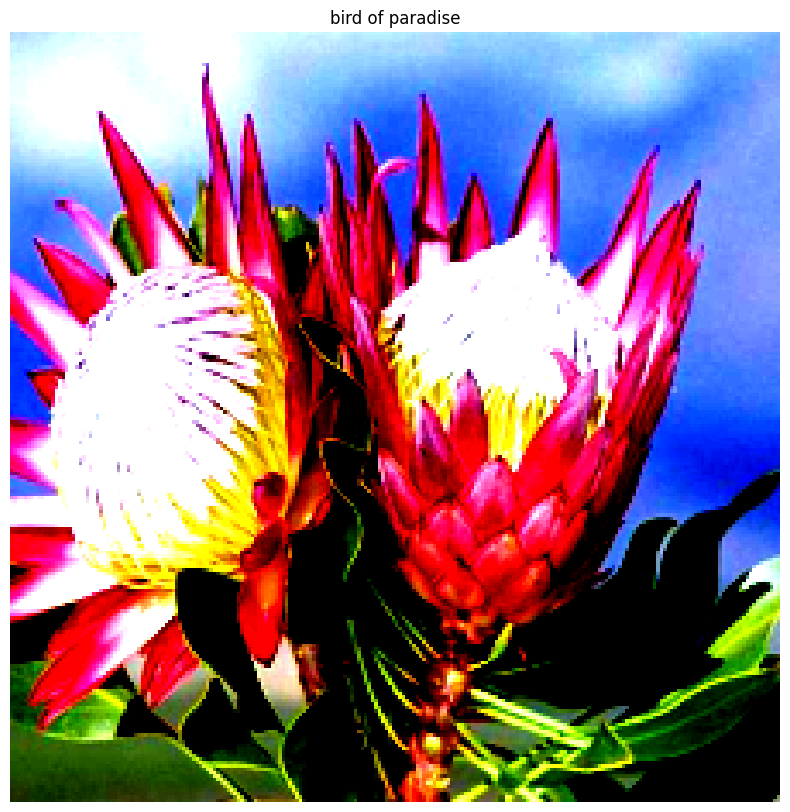

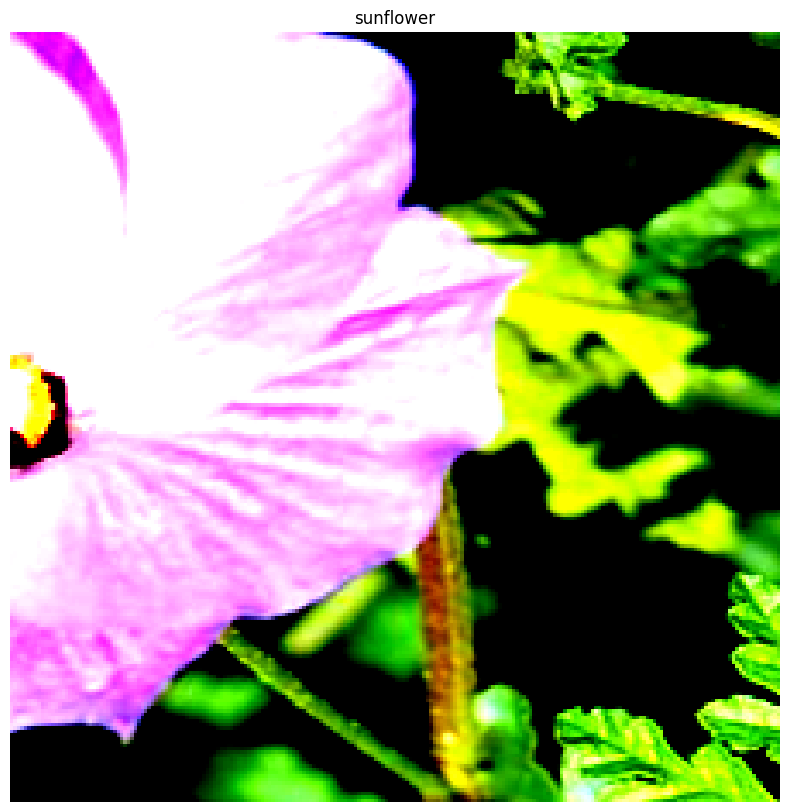

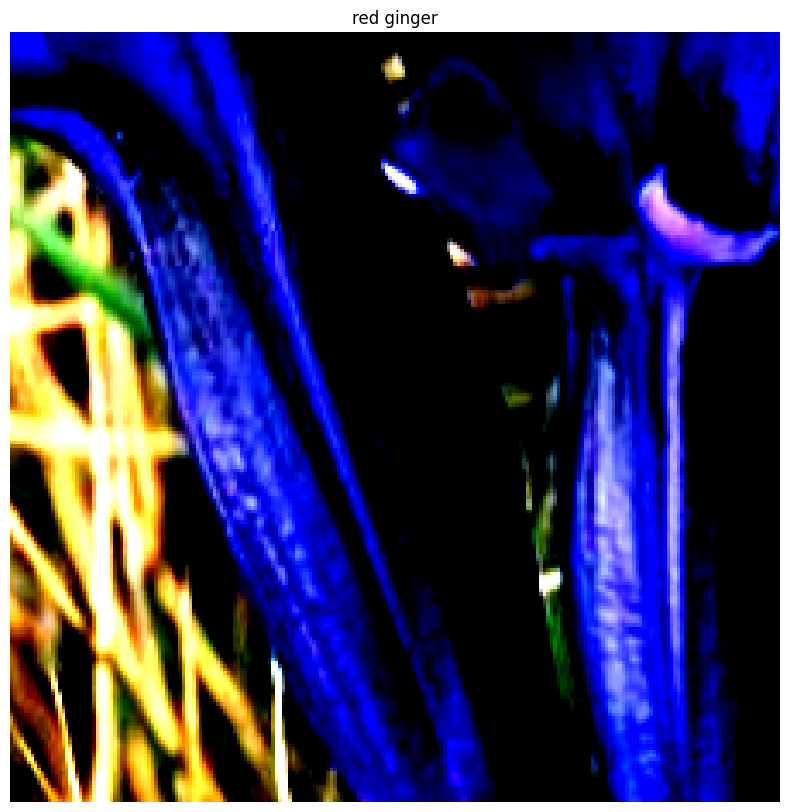

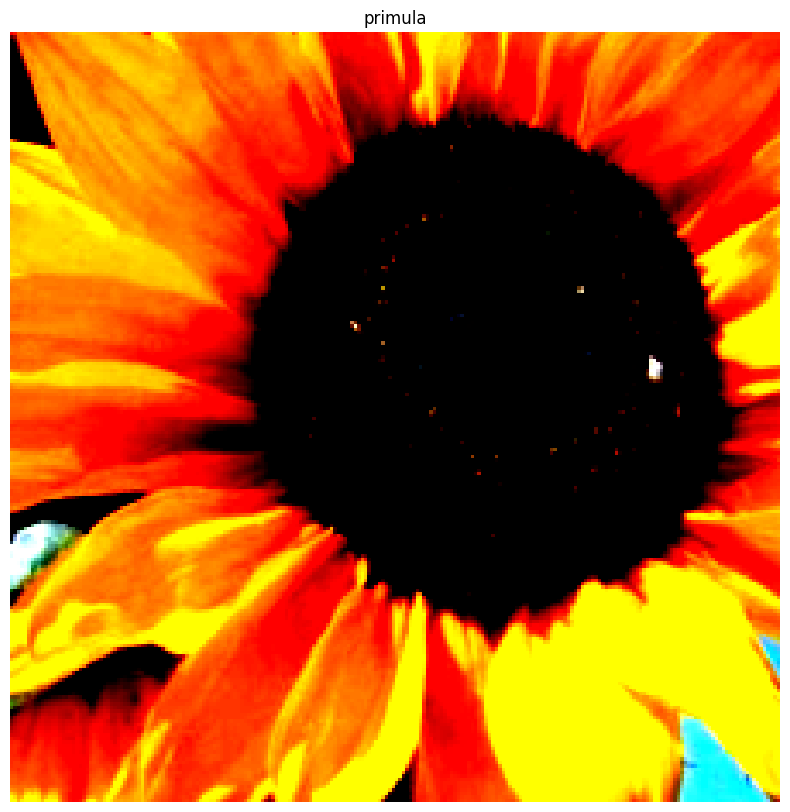

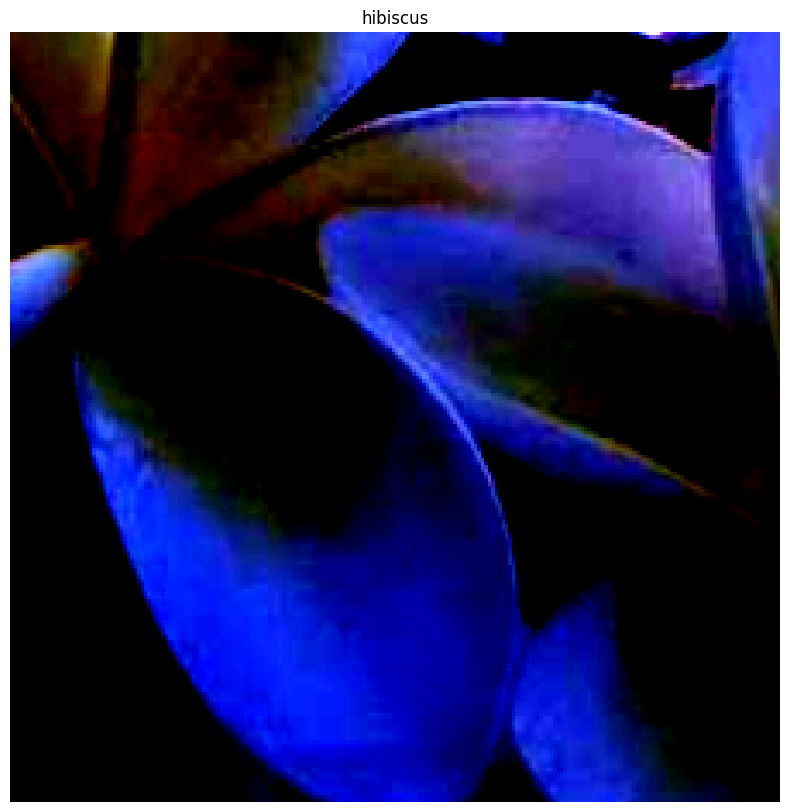

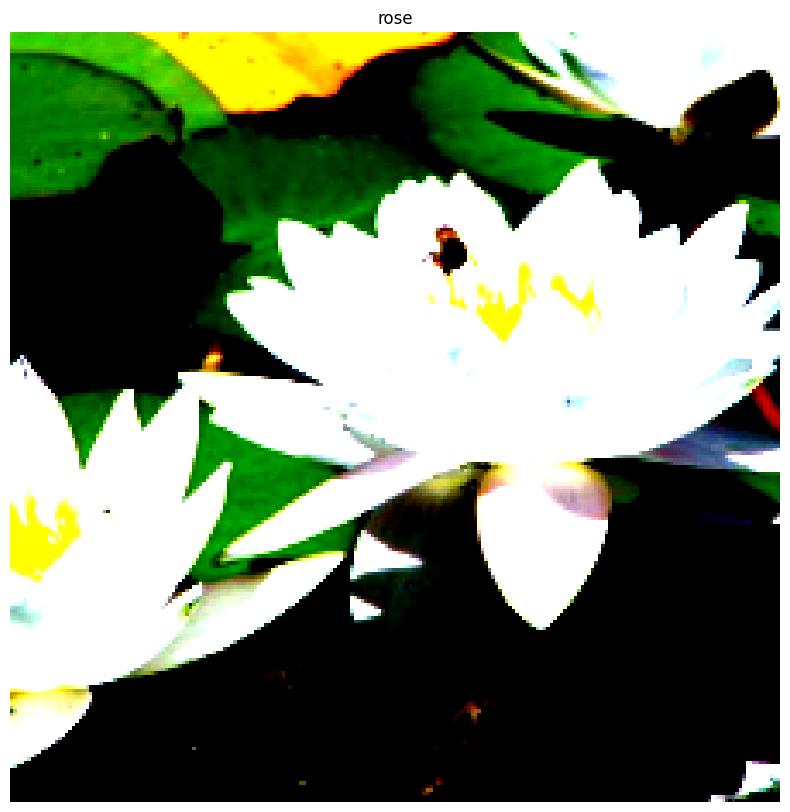

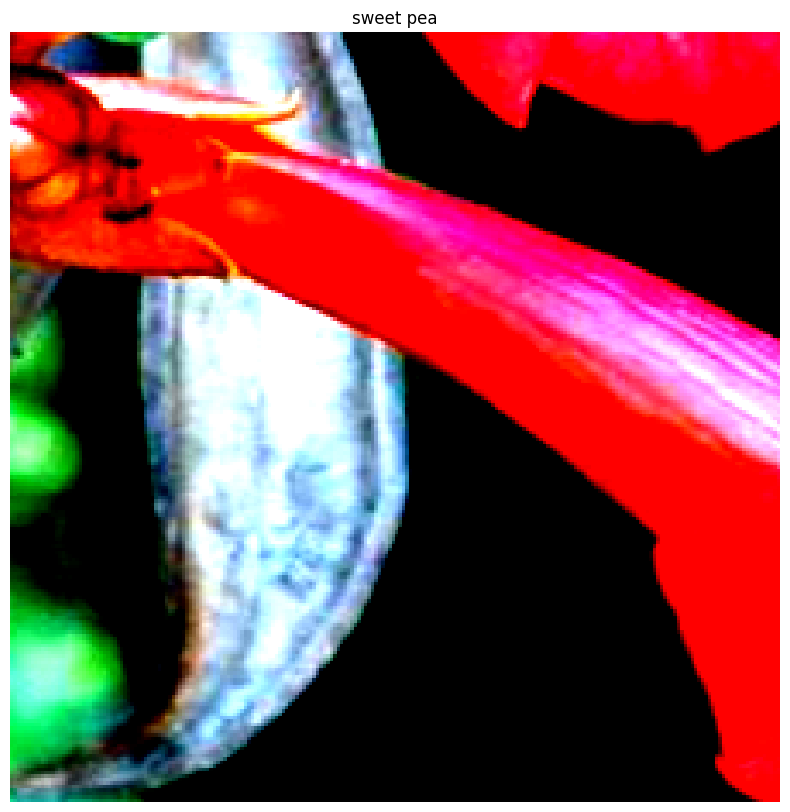

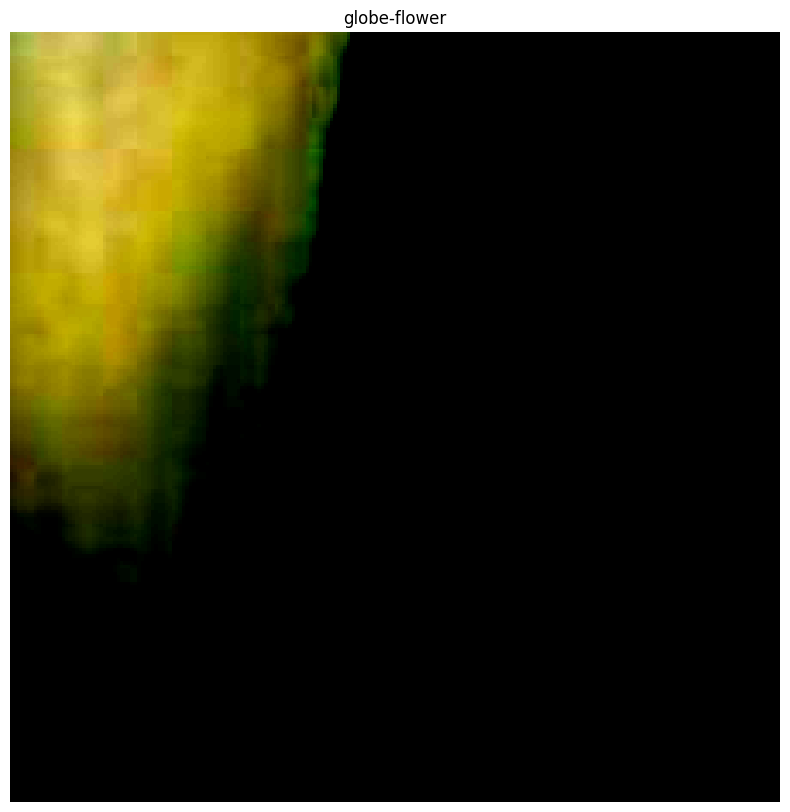

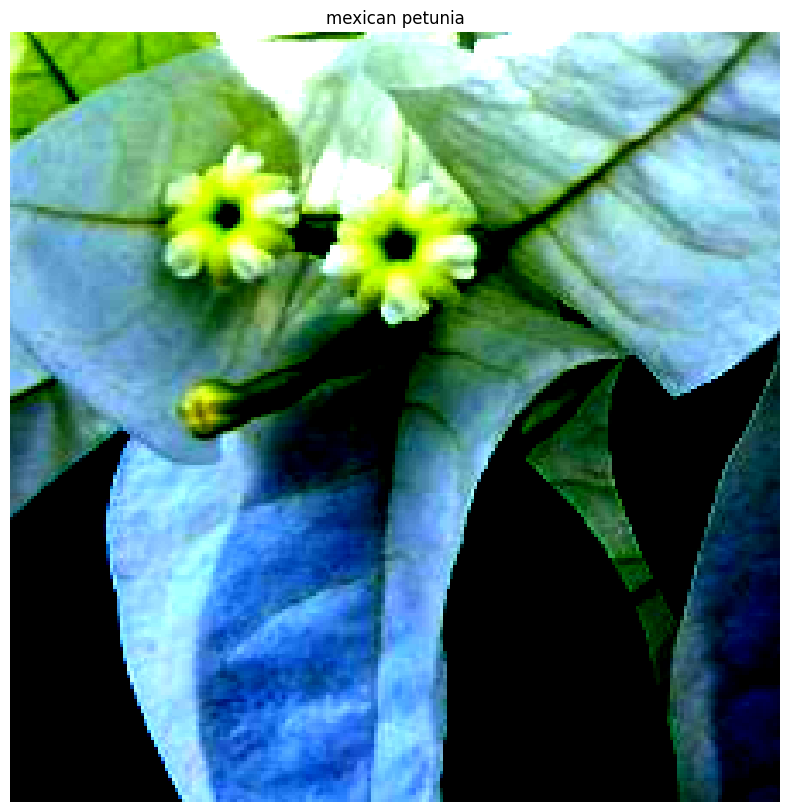

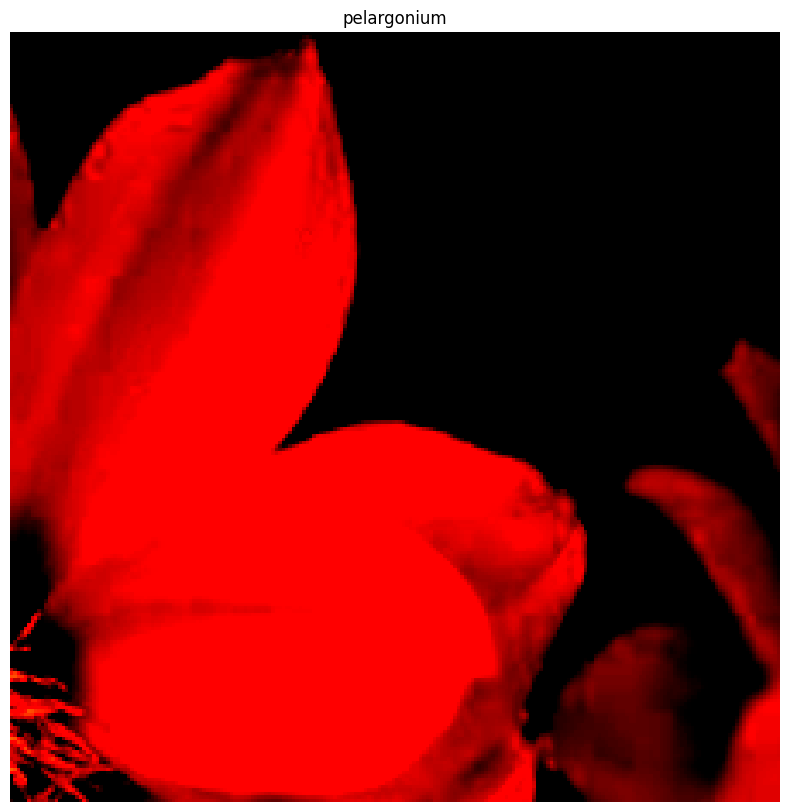

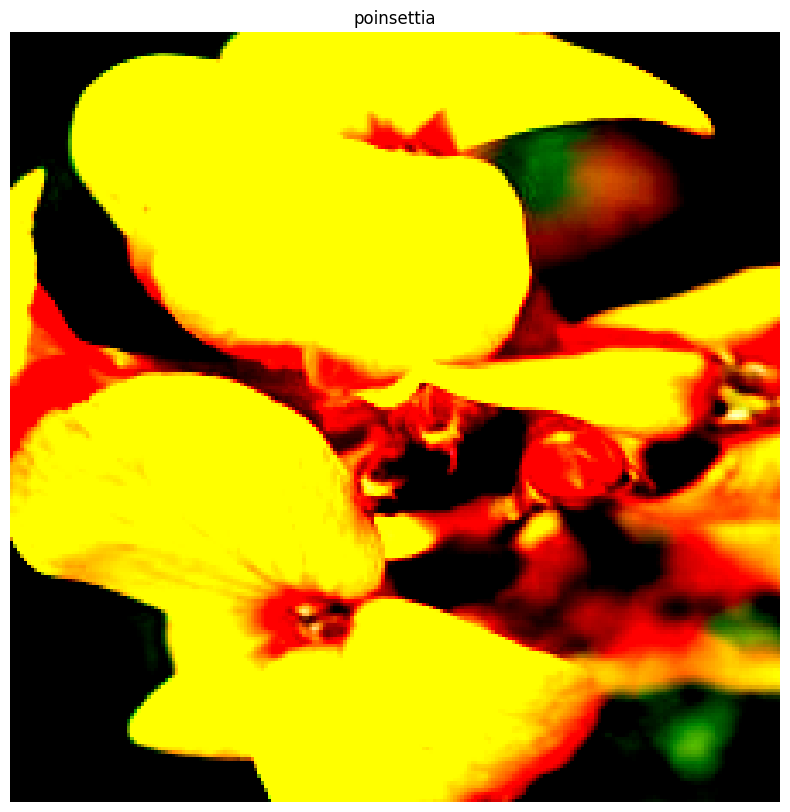

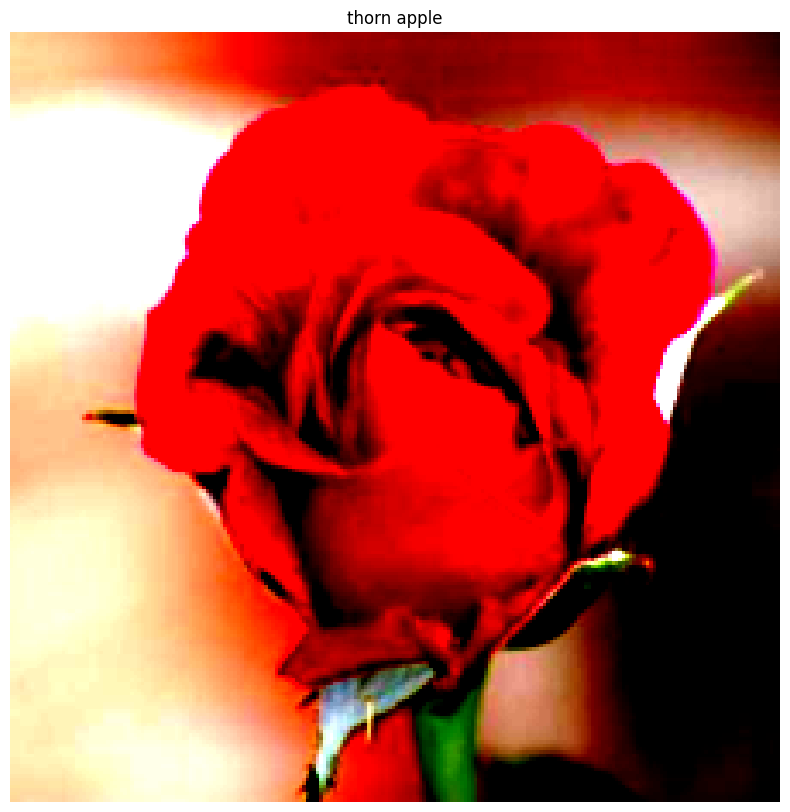

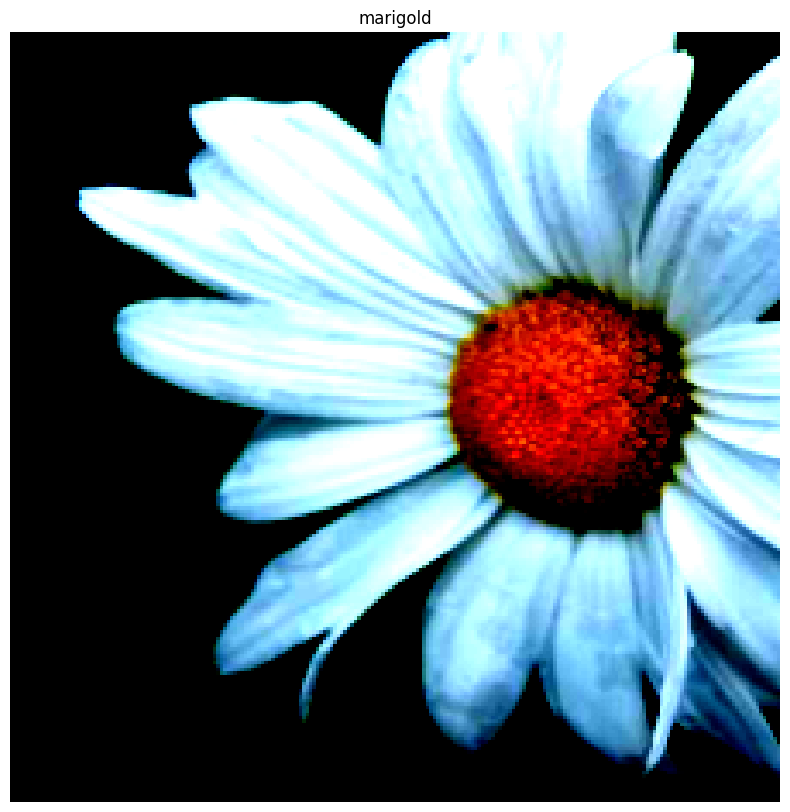

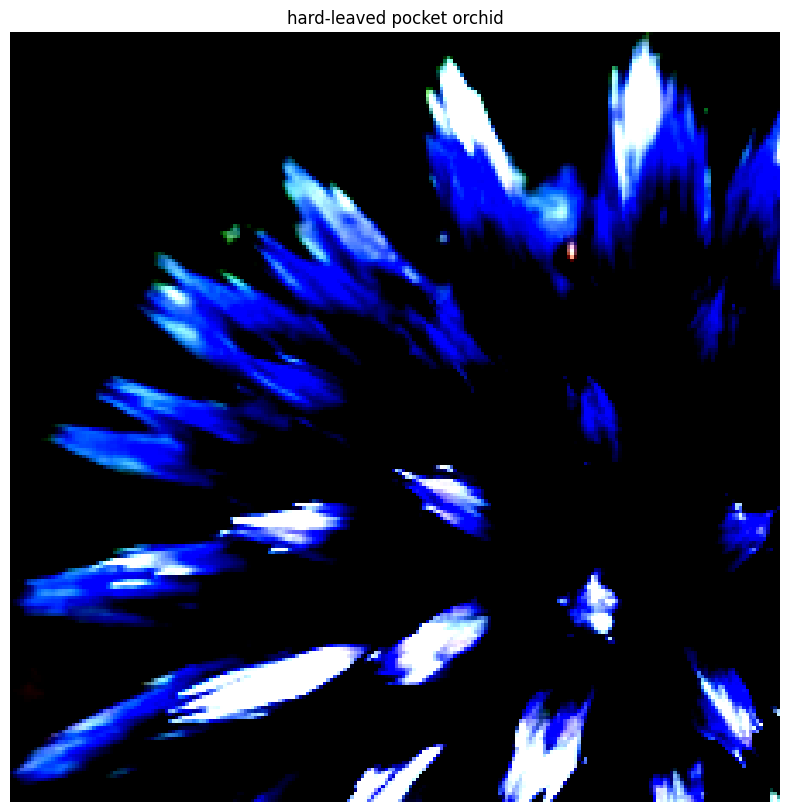

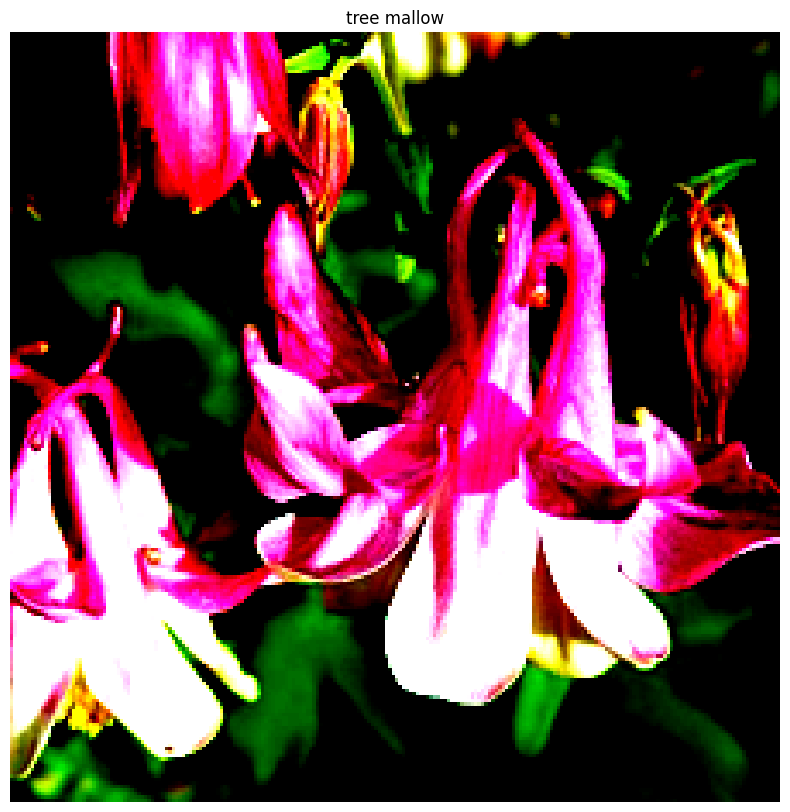

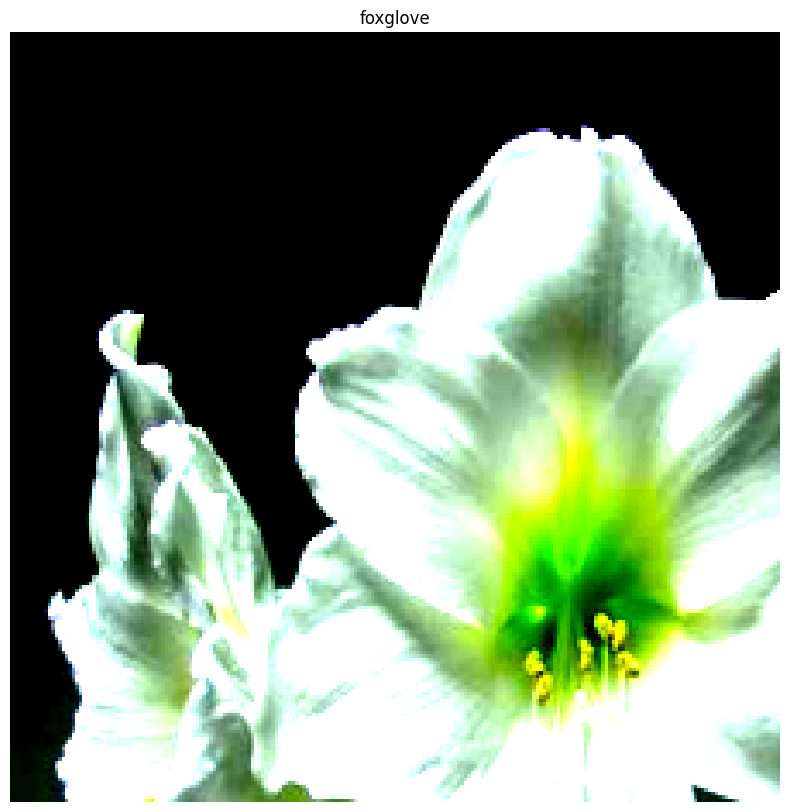

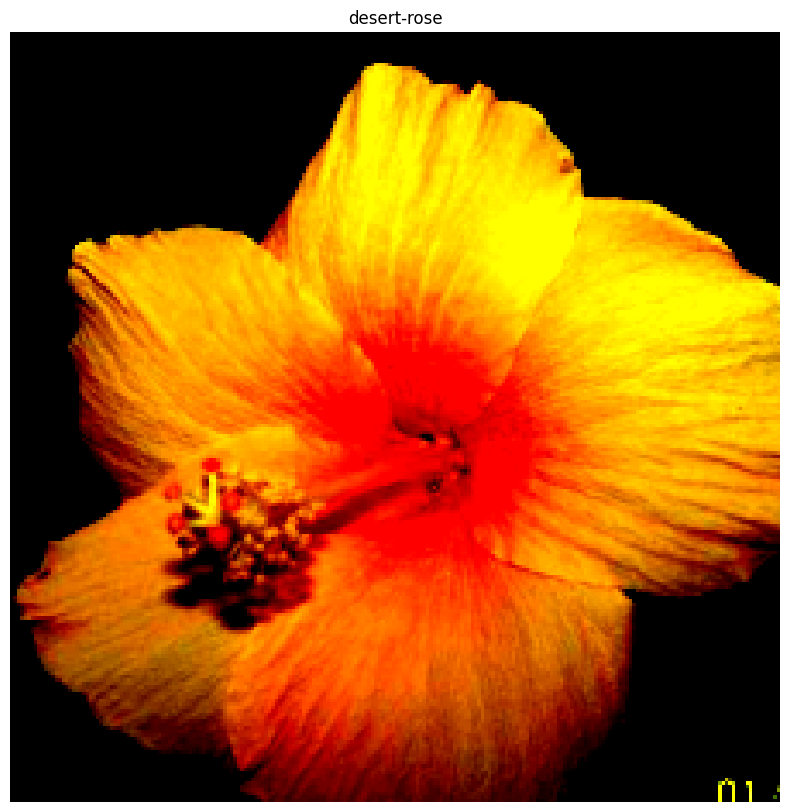

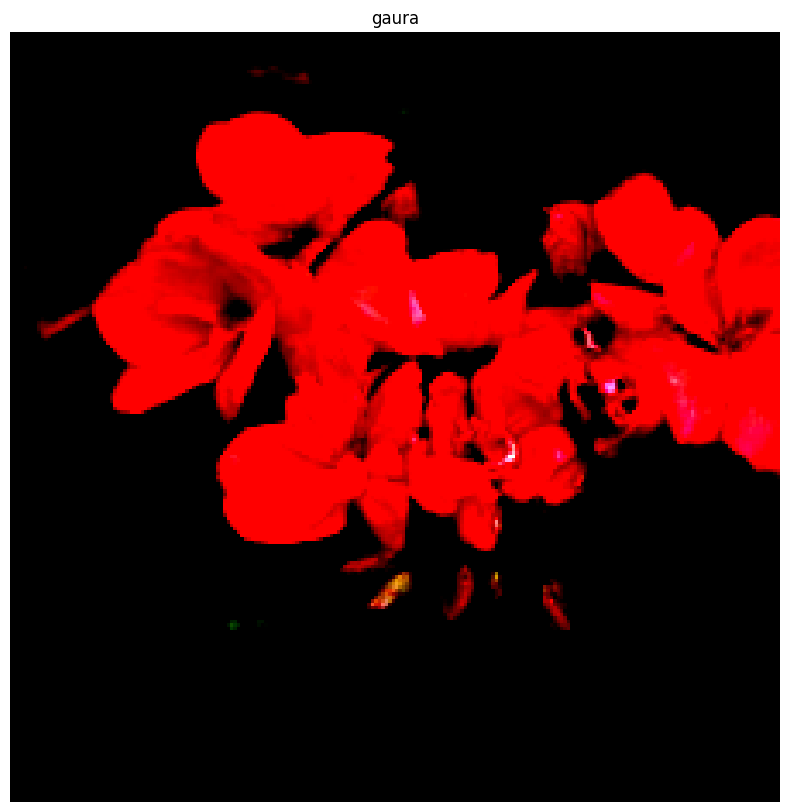

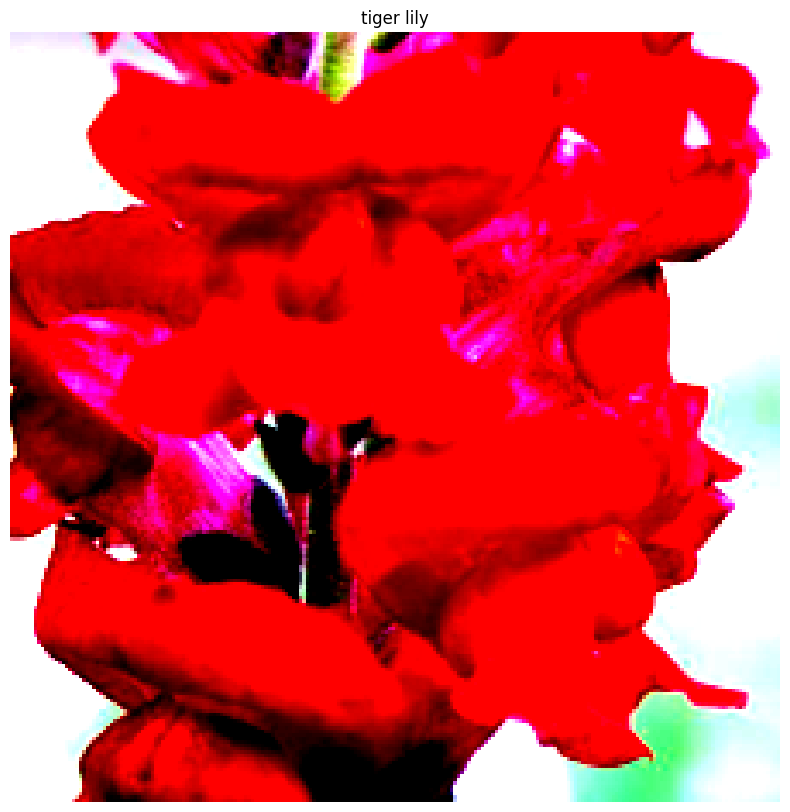

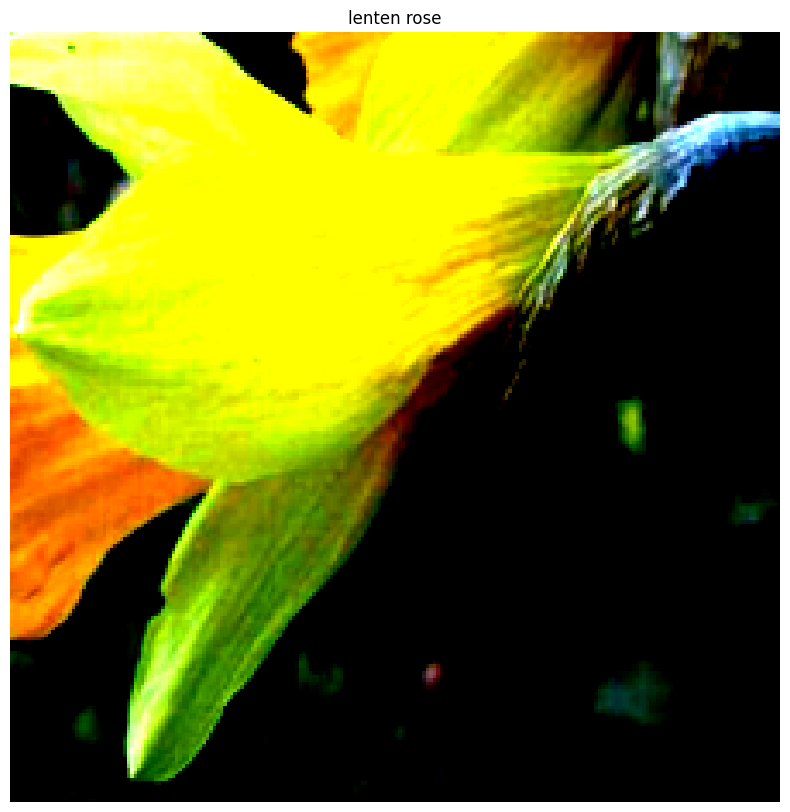

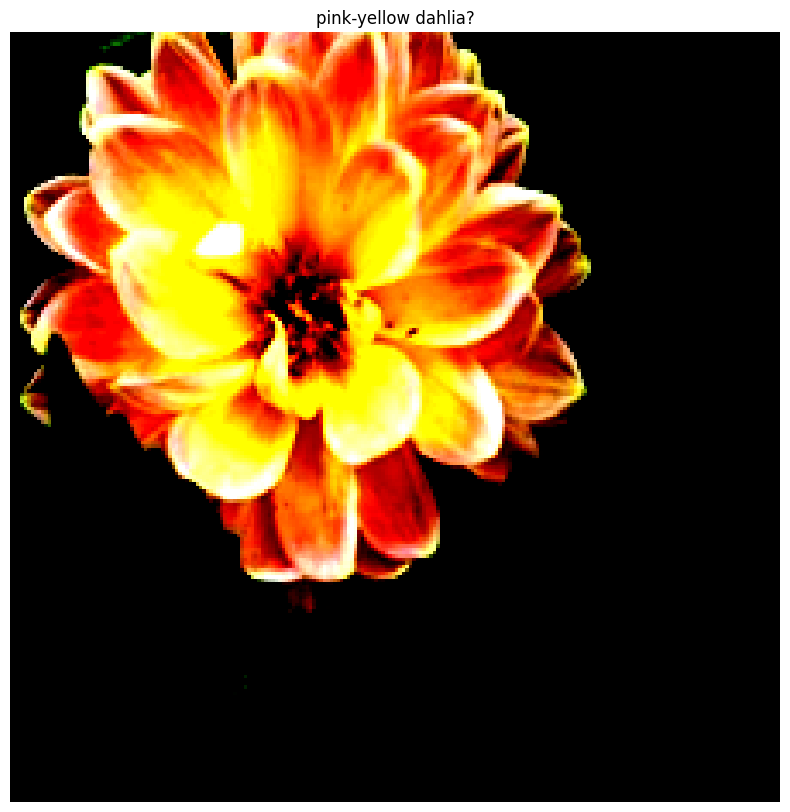

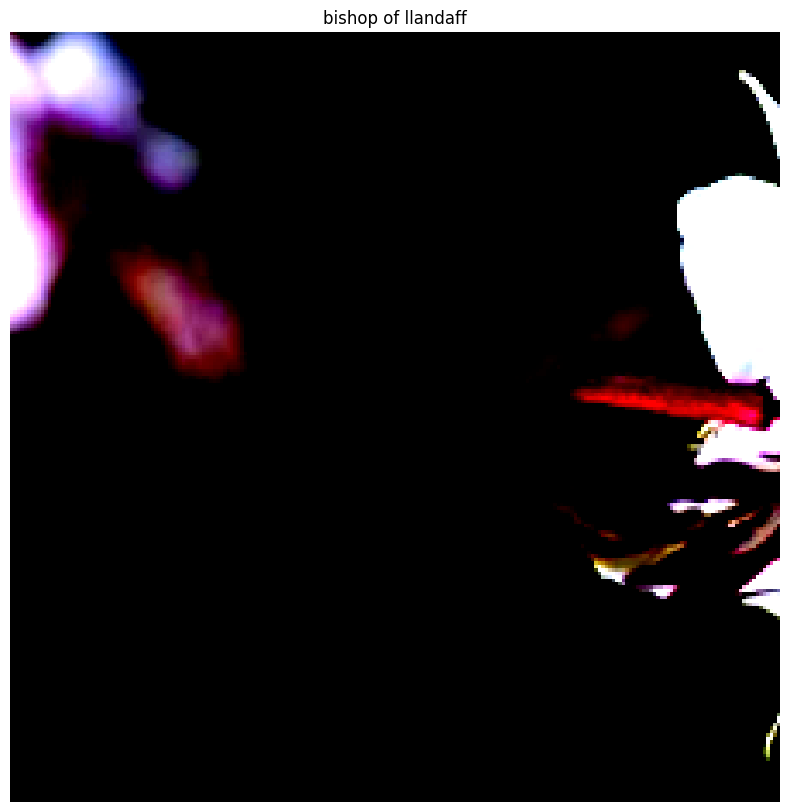

In [ ]:
for i in range(len(images)):
  plot(images[i],dataset_labels[labels[i].item()])

In [ ]:
dataset_labels

0                  pink primrose
1      hard-leaved pocket orchid
2               canterbury bells
3                      sweet pea
4               english marigold
                 ...            
97               mexican petunia
98                      bromelia
99                blanket flower
100              trumpet creeper
101              blackberry lily
Name: 0, Length: 102, dtype: object

In [ ]:
dataset_labels[labels.detach().cpu().numpy()]

99               blanket flower
62             black-eyed susan
26     prince of wales feathers
73                         rose
74                  thorn apple
97              mexican petunia
49             common dandelion
75                morning glory
41                     daffodil
96                       mallow
7              bird of paradise
53                    sunflower
23                   red ginger
52                      primula
82                     hibiscus
73                         rose
3                     sweet pea
15                 globe-flower
97              mexican petunia
54                  pelargonium
43                   poinsettia
74                  thorn apple
46                     marigold
1     hard-leaved pocket orchid
85                  tree mallow
93                     foxglove
84                  desert-rose
56                        gaura
5                    tiger lily
39                  lenten rose
59          pink-yellow dahlia?
55      

In [ ]:
import requests
from torchvision.models import alexnet

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
alexnet_labels = pd.Series({int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()})

model = alexnet(weights='DEFAULT').to(device)

In [ ]:
outputs = model(images.to(device))

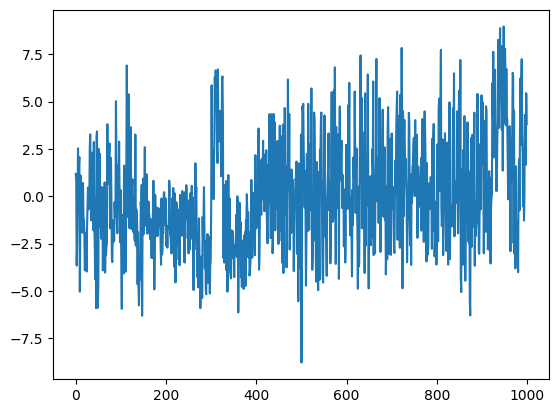

In [ ]:
plt.plot(outputs[0].detach().cpu().numpy())

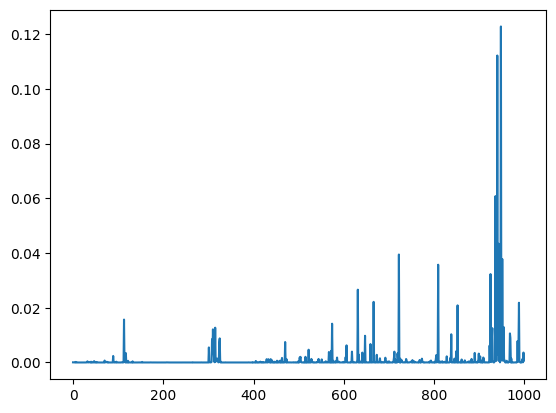

In [ ]:
plt.plot(torch.softmax(outputs,1)[0].detach().cpu().numpy())

In [ ]:
predictions = outputs.max(1)[1].detach().cpu().numpy()

In [ ]:
alexnet_labels[predictions]

948                                         Granny Smith
309                                                  bee
738                                       pot, flowerpot
309                                                  bee
309                                                  bee
617                            lab coat, laboratory coat
324                                    cabbage butterfly
157                                             papillon
312                                              cricket
723                                             pinwheel
944                           artichoke, globe artichoke
738                                       pot, flowerpot
946                                              cardoon
309                                                  bee
986    yellow lady's slipper, yellow lady-slipper, Cy...
985                                                daisy
994                            stinkhorn, carrion fungus
64                             

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
def finetune_model(x,w):

    return x@w[0]

In [ ]:
def make_plots():

    acc_train = acc(finetune_model(x,w),y)

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
%pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=131af21f4eaef18f3deaf9e5a34757713eb8ffc7adbb7aa9ed5a304ba07db4bc
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
import wandb as wb
wb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import numpy as np

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [Truncated_Normal((1000,102)).to(device)]
w[0].requires_grad = True

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = next(iter(dataloader))
    x = model(x.to(device))
    y = y.to(device)

    loss = cross_entropy(softmax(finetune_model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()
